<h1 align='center'> Red Wine Quality </h1>

### About Wine
- Wine is an alcoholic drink typically made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol, carbon dioxide, and heat.
- Red wine is made with darker red or black grapes, and the skins remain on the grapes during the fermentation process.

### Objective
Predict the Quality of Red Wine. 

The wine connoisseurs in a wine factory in Portugal are debating on the quality of red and white wines. They thought to take the help of Data Science industry for this work. They hired you as a data scientist as you were the best data scientist in the world. 

### About the dataset
The dataset is about red vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. The dataset is related to red variant of the Portuguese "Vinho Verde" wine.

#### Data Description
Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol Output variable (based on sensory data):
12. quality (score between 0 and 10)

### Evaluation Criteria
Submissions are evaluated using Accuracy Score. 

<hr>

### Importing Modules

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

#### Loading Training Dataset 

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/Training_set_redwine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.1,0.390,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5,5
1,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
2,8.4,0.670,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,4
3,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.8,6
4,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


### Inspecting Data

In [3]:
df.shape

(1119, 12)

- Training Dataset comprises 1119 observations(rows) and 12 features(columns).
- Out of the 12, one is the target variable and rest 11 are input variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1119 non-null   float64
 1   volatile acidity      1119 non-null   float64
 2   citric acid           1119 non-null   float64
 3   residual sugar        1119 non-null   float64
 4   chlorides             1119 non-null   float64
 5   free sulfur dioxide   1119 non-null   float64
 6   total sulfur dioxide  1119 non-null   float64
 7   density               1119 non-null   float64
 8   pH                    1119 non-null   float64
 9   sulphates             1119 non-null   float64
 10  alcohol               1119 non-null   float64
 11  quality               1119 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 105.0 KB


- The data has only float and integer values.
- There are no missing values

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Statistical Summary
- Get a Statistical Overview using Describe

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1119.0,8.345040,1.776786,4.70000,7.100000,7.90000,9.30000,15.60000
volatile acidity,1119.0,0.526609,0.175865,0.12000,0.390000,0.52000,0.63500,1.58000
citric acid,1119.0,0.270206,0.195797,0.00000,0.090000,0.26000,0.42000,1.00000
residual sugar,1119.0,2.567248,1.475748,0.90000,1.900000,2.20000,2.60000,15.40000
chlorides,1119.0,0.086708,0.044787,0.01200,0.070000,0.07900,0.09000,0.61000
free sulfur dioxide,1119.0,15.920018,10.643919,1.00000,7.000000,14.00000,21.00000,72.00000
total sulfur dioxide,1119.0,46.411528,33.363313,6.00000,21.500000,37.00000,62.00000,289.00000
density,1119.0,0.996765,0.001942,0.99007,0.995575,0.99676,0.99787,1.00369
pH,1119.0,3.308919,0.156648,2.74000,3.210000,3.31000,3.40000,4.01000
sulphates,1119.0,0.658231,0.168539,0.37000,0.550000,0.62000,0.73000,2.00000


### Inference:
- The attributes(predictors) “residual sugar”, ”free sulfur dioxide”, ”total sulfur dioxide” has a **large difference between 75th %tile and max values** .
Thus, the observation suggest that there are extreme values i.e Outliers in our dataset.

### Exploratory Data Analysis

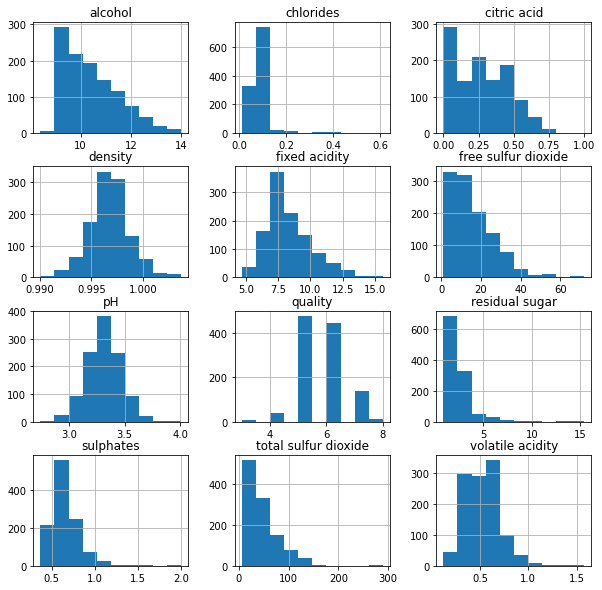

In [7]:
df.hist(figsize=(10,10))
plt.show()

### Inference :
- The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left.
- The attributes 'density' and 'pH' are quite normally distributed.
- Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

In [8]:
df['quality'].unique()

array([5, 4, 6, 7, 8, 3], dtype=int64)

- Target variable/Dependent variable is discrete and categorical in nature.
- “quality” score scale ranges from 1 to 10 : where, 1 being poor and 10 being the best.
- 1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8


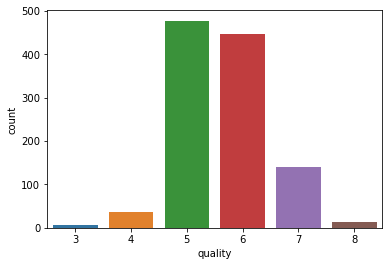

In [9]:
sns.countplot(df.quality)

#### Frequency Counts of each Quality Value

In [10]:
df['quality'].value_counts()

5    477
6    446
7    139
4     37
8     13
3      7
Name: quality, dtype: int64

This tells us the vote count of each quality score in descending order.
- “quality” has most values concentrated in the categories 5, 6 and 7.
- Only a few observations made for the categories 4,3 & 8

#### Renaming Columns

In [11]:
df.rename(columns= {'fixed acidity': 'fixed_acidity',
                    'volatile acidity': 'volatile_acidity', 
                    'citric acid': 'citric_acid' , 
                    'residual sugar': 'residual_sugar', 
                    'free sulfur dioxide': 'free_sulfur_dioxide',
                    'total sulfur dioxide': 'total_sulfur_dioxide'}, 
          inplace=True) 
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.1,0.390,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5,5
1,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
2,8.4,0.670,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,4
3,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.8,6
4,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [12]:
dup = df[df.duplicated()]
dup.shape

(112, 12)

There are 112 duplicates. 
The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. 
We can thus keep these duplicates.

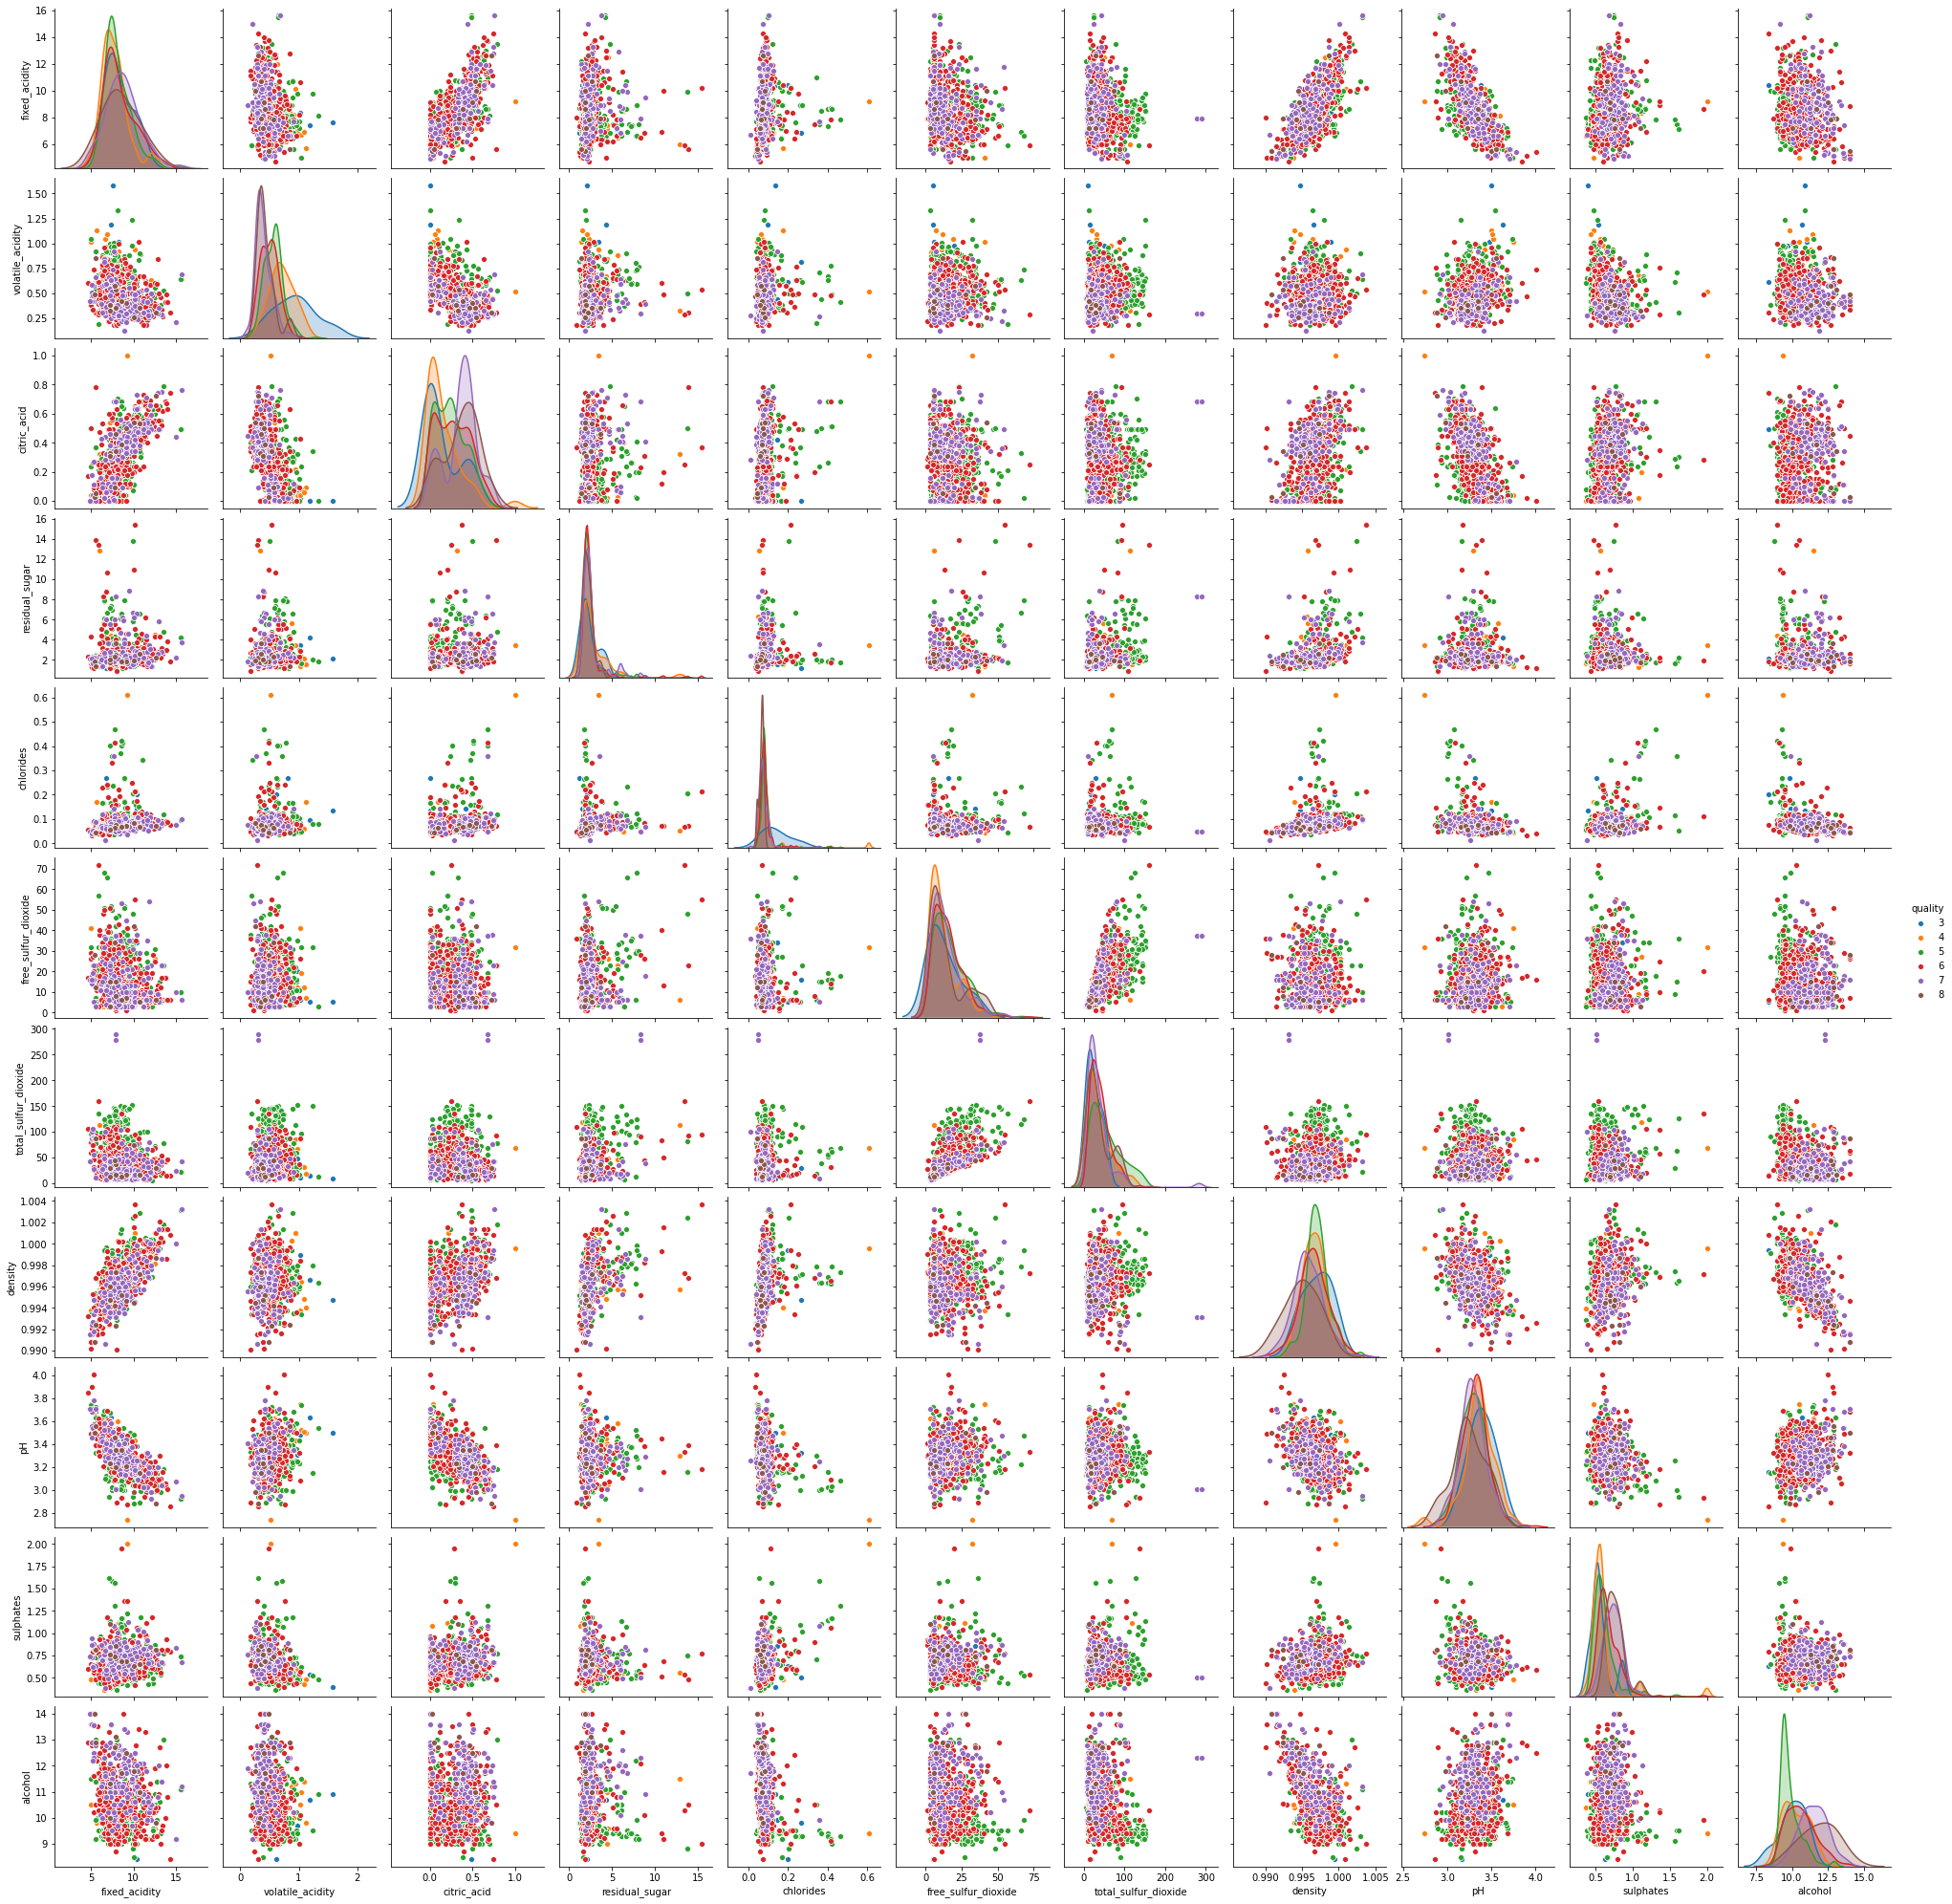

In [13]:
sns.pairplot(df, hue='quality')

Looking at scatterplot for this pair of variables, 
- We can see the positive linear correlation between some variables. 
- We can observe the upward trend, and also the points are not too dispersed.

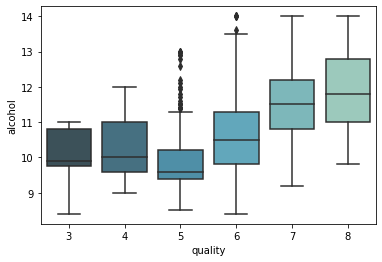

In [14]:
sns.boxplot(df.quality, df.alcohol, palette='GnBu_d')

The above plot shows the **increase in the quality of wine with an increase in alcohol**. 
The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine, the better will be the quality.

Also, the points lying outside the whiskers are the outliers.


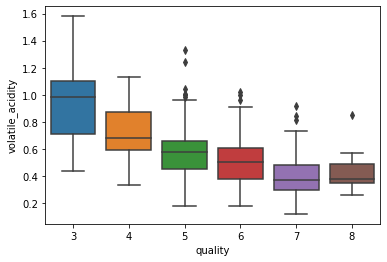

In [15]:
sns.boxplot(df.quality, df.volatile_acidity, data=df)

The above plot shows the **increase in the quality of wine with an decrease in Volatile_acidity**. The quality of the wine is indirectly related to the amount of Volatile_acidity in the wine. More the Volatile_acidity in the wine, the worst will be the quality.

Also, the points lying outside the whiskers are the outliers.

### Correlation Matrix

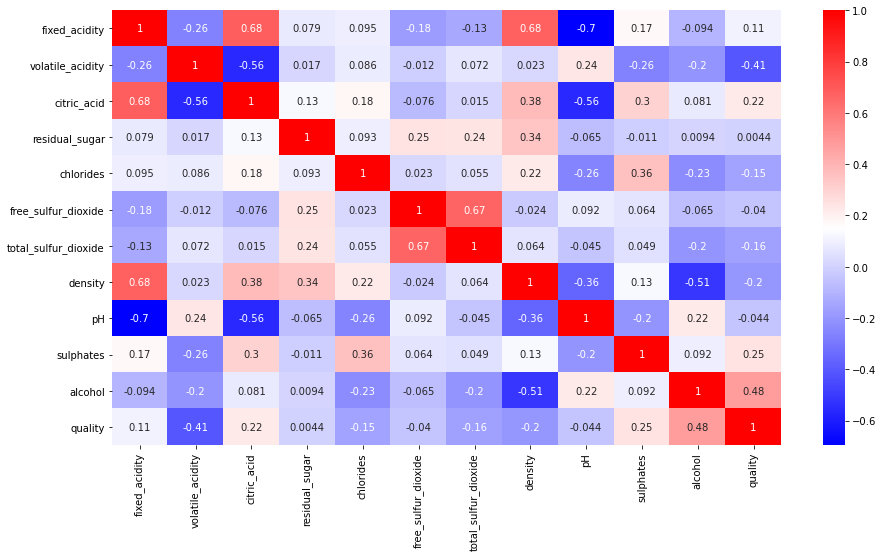

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap = 'bwr')

### Inference
- Alcohol has the highest positive correlation with wine quality
- There is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.
- There is a relatively high negative correlation between fixed_acidity and pH.
- Density has a strong positive correlation with fixed_acidity, whereas it has a strong negative correlation with alcohol.
citric acid & volatile acidity have negative correlation.
- free sulphur dioxide & total sulphur dioxide have positive correlation

### Split data into x and y:

In [17]:
x = df.drop(['quality'], axis=1)
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,11.1,0.390,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5
1,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
2,8.4,0.670,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2
3,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.8
4,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4


In [18]:
y = df.quality
y.head()

0    5
1    5
2    4
3    6
4    5
Name: quality, dtype: int64

### Spliting dataset into test and training data 

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

<h1 align='center'> Decision Tree </h1> 

In [20]:
from sklearn.tree import DecisionTreeClassifier

### Training Model

In [21]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### Prediction on Training and Testset

In [22]:
y_test_pred = dt.predict(x_test)
y_train_pred = dt.predict(x_train)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Accuracy on Training and Test dataset

In [24]:
print("Training Accuracy: ", accuracy_score(y_train,y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test,y_test_pred))

Training Accuracy:  0.5959475566150179
Test Accuracy:  0.575


- As the Test Accuracy is Less than Training Accuracy , Model seems to be Overfitted

### Visualising Results

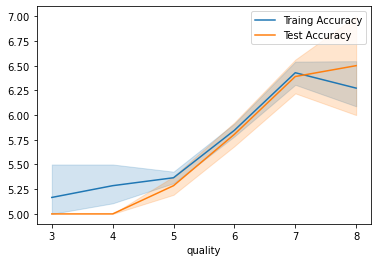

In [25]:
sns.lineplot(y_train, y_train_pred, label='Traing Accuracy')
sns.lineplot(y_test, y_test_pred, label = 'Test Accuracy')
plt.show()

### Confusion Matrix and Classification report

In [26]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0 87 30  2  0]
 [ 0  0 36 57 15  0]
 [ 0  0  1 23 17  0]
 [ 0  0  0  1  1  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.65      0.73      0.69       119
           6       0.51      0.53      0.52       108
           7       0.49      0.41      0.45        41
           8       0.00      0.00      0.00         2

    accuracy                           0.57       280
   macro avg       0.27      0.28      0.28       280
weighted avg       0.55      0.57      0.56       280



<h1 align='center'> Random Forest </h1> 

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators= 1000, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

#### Prediction on Training and Testset

In [29]:
train_pred = rf.predict(x_train)
pred = rf.predict(x_test)

#### Accuracy on Training and Test dataset 

In [30]:
print("Training Accuracy: ",accuracy_score(y_train, train_pred))
print("Test Accuracy: ",accuracy_score(y_test, pred))

Training Accuracy:  1.0
Test Accuracy:  0.6821428571428572


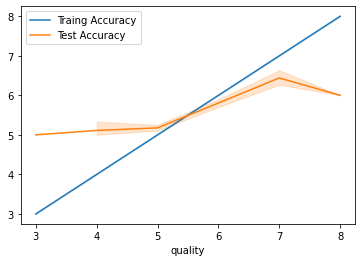

In [31]:
sns.lineplot(y_train, train_pred, label='Traing Accuracy')
sns.lineplot(y_test,  pred, label = 'Test Accuracy')
plt.show()

- Models fails to predict on Unseen Data, ie, Model is Overfitted

### Features  -- Visual representation 

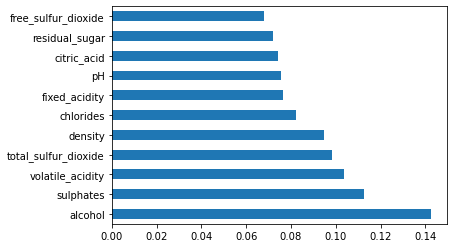

In [32]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

### Confusion Matrix and Classification Report

In [33]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred))

print("\nClassification Report:")
print(classification_report(y_test, pred))

Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  0  8  1  0  0]
 [ 0  0 98 21  0  0]
 [ 0  0 28 73  7  0]
 [ 0  0  2 19 20  0]
 [ 0  0  0  2  0  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.72      0.82      0.77       119
           6       0.63      0.68      0.65       108
           7       0.74      0.49      0.59        41
           8       0.00      0.00      0.00         2

    accuracy                           0.68       280
   macro avg       0.35      0.33      0.33       280
weighted avg       0.66      0.68      0.66       280



### Randomized-SearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV

rf2 = RandomForestClassifier(random_state=42)

In [35]:
grid = {
    'n_estimators': [100,250,1000,1500],
    'max_depth' : [2,3,5,7,10],
    'max_features': [5,7,8,9,10]
}

random_cv = RandomizedSearchCV(estimator=rf2,
                              param_distributions= grid,
                              cv=5, n_iter=50,
                              scoring='accuracy',
                              n_jobs=4,
                              verbose=5,
                              return_train_score=True,
                               random_state=42
                              )

# Fiitng Model 
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   29.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  5.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=4,
                   param_distributions={'max_depth': [2, 3, 5, 7, 10],
                                        'max_features': [5, 7, 8, 9, 10],
                                        'n_estimators': [100, 250, 1000, 1500]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=5)

####  Best Parameters for the DataSet 

In [36]:
random_cv.best_params_

{'n_estimators': 100, 'max_features': 10, 'max_depth': 10}

#### Fitting Model using Best-parameters

In [38]:
rf_best = random_cv.best_estimator_

# Predicting on Test and Train set
rf2_pred_train = rf_best.predict(x_train)
rf2_pred = rf_best.predict(x_test)

### 10 Important Features taken to train Model

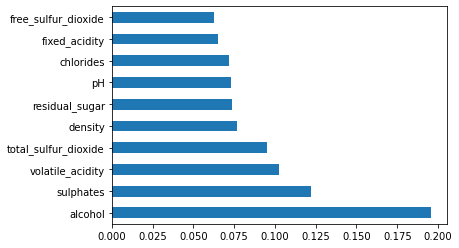

In [39]:
feat_importances = pd.Series(rf_best.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Accuracy Score on Training and Test set

In [40]:
print("Training Accuracy: ",accuracy_score(y_train, rf2_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, rf2_pred))

Training Accuracy:  0.9749702026221693
Test Accuracy:  0.6642857142857143


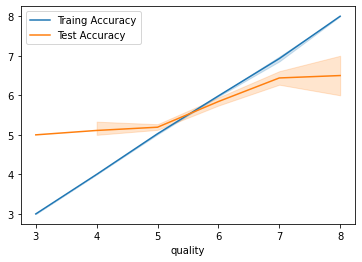

In [41]:
sns.lineplot(y_train, rf2_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, rf2_pred, label = 'Test Accuracy')
plt.show()

- Accuracy Decreases , Model is prone to Overfitting

### Confusion Matrix and Classification Report

In [42]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, rf2_pred))

print("\nClassification Report:")
print(classification_report(y_test, rf2_pred))

Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  0  8  1  0  0]
 [ 0  0 96 23  0  0]
 [ 0  0 27 71 10  0]
 [ 0  0  1 21 19  0]
 [ 0  0  0  1  1  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.72      0.81      0.76       119
           6       0.61      0.66      0.63       108
           7       0.63      0.46      0.54        41
           8       0.00      0.00      0.00         2

    accuracy                           0.66       280
   macro avg       0.33      0.32      0.32       280
weighted avg       0.63      0.66      0.65       280



### Hyper-parameter Tunning

In [43]:
rf1 = RandomForestClassifier(n_estimators= 1000, max_depth=10, min_samples_split=3, max_features=5,
                            random_state= 42)
# Training Model
rf1.fit(x_train, y_train)

# Prediction 
rf1_pred_train = rf1.predict(x_train)
rf1_pred = rf1.predict(x_test)

#### Important Features taken to train Model 

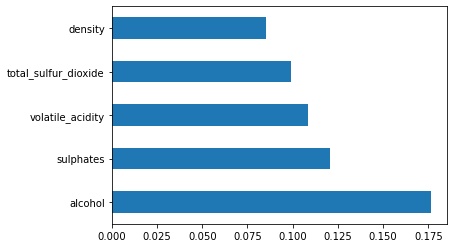

In [44]:
feat_importances = pd.Series(rf1.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

####  Accuracy Score on Training and Test set

In [45]:
print("Training Accuracy: ", accuracy_score(y_train, rf1_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, rf1_pred))

Training Accuracy:  0.9737783075089392
Test Accuracy:  0.6928571428571428


- By reducing Features, Accuracy Increases

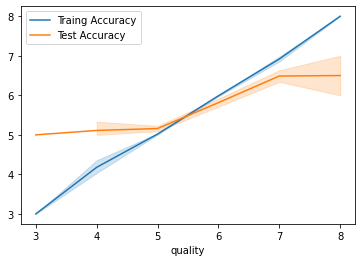

In [46]:
sns.lineplot(y_train, rf1_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, rf1_pred, label = 'Test Accuracy')
plt.show()

### Confusion Matrix and Classification Report

In [47]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, rf1_pred))

print("\nClassification Report:")
print(classification_report(y_test, rf1_pred))

Confusion Matrix: 
[[  0   0   1   0   0   0]
 [  0   0   8   1   0   0]
 [  0   0 100  19   0   0]
 [  0   0  27  74   7   0]
 [  0   0   0  21  20   0]
 [  0   0   0   1   1   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.74      0.84      0.78       119
           6       0.64      0.69      0.66       108
           7       0.71      0.49      0.58        41
           8       0.00      0.00      0.00         2

    accuracy                           0.69       280
   macro avg       0.35      0.34      0.34       280
weighted avg       0.66      0.69      0.67       280



<h1 align='center'> Gradient-Boost </h1>

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

### Training Model and Prediction on Test and Training set

In [49]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

# Prediction 
gb_pred_train = gb.predict(x_train)
gb_pred = gb.predict(x_test)

####  Accuracy Score on Training and Test set

In [50]:
print("Training Accuracy: ",accuracy_score(y_train, gb_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, gb_pred))

Training Accuracy:  0.930870083432658
Test Accuracy:  0.6571428571428571


- Here, Test accuracy is lesser than Training Accuracy

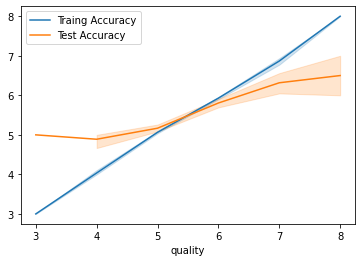

In [51]:
sns.lineplot(y_train, gb_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, gb_pred, label = 'Test Accuracy')
plt.show()

#### Confusion Matrix and Classification Report 

In [52]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, gb_pred))

print("\nClassification Report:")
print(classification_report(y_test, gb_pred))

Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  1  8  0  0  0]
 [ 1  1 95 21  1  0]
 [ 0  0 30 69  9  0]
 [ 0  3  2 16 19  1]
 [ 0  0  0  1  1  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.11      0.14         9
           5       0.70      0.80      0.75       119
           6       0.64      0.64      0.64       108
           7       0.63      0.46      0.54        41
           8       0.00      0.00      0.00         2

    accuracy                           0.66       280
   macro avg       0.36      0.34      0.34       280
weighted avg       0.64      0.66      0.65       280



### Hyper-parameter tunning

In [53]:
gb2 = GradientBoostingClassifier(n_estimators =1000, learning_rate=0.3, max_depth=5, min_samples_split=3,
                                 random_state=42)

# Training Model
gb2.fit(x_train, y_train)

# Prediction 
gb2_pred_train = gb2.predict(x_train)
gb2_pred = gb2.predict(x_test)

#### Accuracy Score on Training and Test set

In [54]:
print("Training Accuracy: ",accuracy_score(y_train, gb2_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, gb2_pred))

Training Accuracy:  1.0
Test Accuracy:  0.6714285714285714


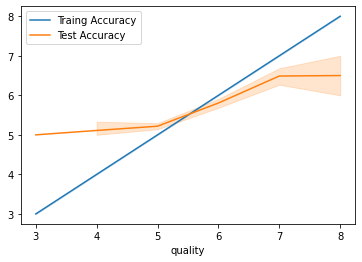

In [55]:
sns.lineplot(y_train, gb2_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, gb2_pred, label = 'Test Accuracy')
plt.show()

#### Confusion Matrix and Classification Report 

In [56]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, gb2_pred))

print("\nClassification Report:")
print(classification_report(y_test, gb2_pred))

Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  0  8  1  0  0]
 [ 0  0 93 26  0  0]
 [ 0  1 27 72  8  0]
 [ 0  1  1 16 23  0]
 [ 0  0  0  1  1  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.72      0.78      0.75       119
           6       0.62      0.67      0.64       108
           7       0.72      0.56      0.63        41
           8       0.00      0.00      0.00         2

    accuracy                           0.67       280
   macro avg       0.34      0.33      0.34       280
weighted avg       0.65      0.67      0.66       280



<h1 align='center'> XG-Boost </h1>

In [57]:
import xgboost as xgb

### Training Model and Prediction on Test and Training set 

In [58]:
xg = xgb.XGBClassifier( n_estimators = 250, learning_rate=0.1, random_state=42)

xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Prediction on Training and Test set

In [59]:
xg_pred_train = xg.predict(x_train)
xg_pred = xg.predict(x_test)

#### Accuracy Score on Training and Test set

In [60]:
print("Training Accuracy: ",accuracy_score(y_train, xg_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, xg_pred))

Training Accuracy:  1.0
Test Accuracy:  0.6928571428571428


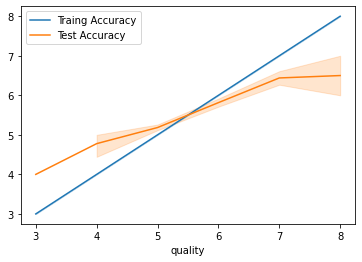

In [61]:
sns.lineplot(y_train, xg_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, xg_pred, label = 'Test Accuracy')
plt.show()

#### Confusion Matrix and Classification Report 

In [62]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, xg_pred))

print("\nClassification Report:")
print(classification_report(y_test, xg_pred))

Confusion Matrix: 
[[ 0  1  0  0  0  0]
 [ 0  2  7  0  0  0]
 [ 0  0 97 22  0  0]
 [ 0  1 25 75  7  0]
 [ 0  0  2 19 20  0]
 [ 0  0  0  1  1  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.22      0.31         9
           5       0.74      0.82      0.78       119
           6       0.64      0.69      0.67       108
           7       0.71      0.49      0.58        41
           8       0.00      0.00      0.00         2

    accuracy                           0.69       280
   macro avg       0.43      0.37      0.39       280
weighted avg       0.68      0.69      0.68       280



#### Hyper-parameter Tunning

In [63]:
xg1 = xgb.XGBClassifier(max_depth =5, n_estimators = 250, learning_rate=0.3, gamma = 0.1, 
                       colsample_bytree=0.6, subsample=0.8,
                      n_jobs = -1, random_state=42)

xg1.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Prediction on Training and Test set 

In [64]:
xg_pred_train = xg1.predict(x_train)
xg_pred = xg1.predict(x_test)

#### Accuracy Score on Training and Test set

In [65]:
print("Training Accuracy: ",accuracy_score(y_train, xg_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, xg_pred))

Training Accuracy:  1.0
Test Accuracy:  0.6678571428571428


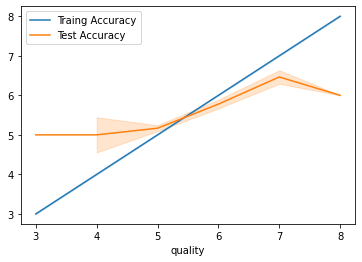

In [66]:
sns.lineplot(y_train, xg_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, xg_pred, label = 'Test Accuracy')
plt.show()

### Confusion Matrix and Classification Report

In [67]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, xg_pred))

print("\nClassification Report:")
print(classification_report(y_test, xg_pred))

Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  2  5  2  0  0]
 [ 0  2 95 22  0  0]
 [ 0  2 28 70  8  0]
 [ 0  0  1 20 20  0]
 [ 0  0  0  2  0  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.22      0.27         9
           5       0.73      0.80      0.76       119
           6       0.60      0.65      0.62       108
           7       0.71      0.49      0.58        41
           8       0.00      0.00      0.00         2

    accuracy                           0.67       280
   macro avg       0.40      0.36      0.37       280
weighted avg       0.66      0.67      0.66       280



<h1 align='center'> Test Dataset </h1>

In [68]:
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/Testing_set_redwine.csv')
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.2,0.58,0.00,1.60,0.065,8.0,18.0,0.99660,3.56,0.84,9.4
1,7.0,0.50,0.25,2.00,0.070,3.0,22.0,0.99630,3.25,0.63,9.2
2,8.9,0.48,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.1
3,11.2,0.50,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.2
4,9.8,0.66,0.39,3.20,0.083,21.0,59.0,0.99890,3.37,0.71,11.5


In [69]:
test.rename(columns= {'fixed acidity': 'fixed_acidity',
                    'volatile acidity': 'volatile_acidity', 
                    'citric acid': 'citric_acid' , 
                    'residual sugar': 'residual_sugar', 
                    'free sulfur dioxide': 'free_sulfur_dioxide',
                    'total sulfur dioxide': 'total_sulfur_dioxide'}, 
          inplace=True) 
test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.2,0.58,0.00,1.60,0.065,8.0,18.0,0.99660,3.56,0.84,9.4
1,7.0,0.50,0.25,2.00,0.070,3.0,22.0,0.99630,3.25,0.63,9.2
2,8.9,0.48,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.1
3,11.2,0.50,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.2
4,9.8,0.66,0.39,3.20,0.083,21.0,59.0,0.99890,3.37,0.71,11.5


### Prediction on Test Dataset Using RandomForest

In [70]:
ypred = rf1.predict(test)
target = []
for i in ypred:
    target.append(int(i))
#print(target)

In [71]:
result = pd.DataFrame(ypred) 
result.index = test.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_RandomForest.csv",index=False)

In [72]:
pd.read_csv('Prediction_results_RandomForest.csv')

,prediction
0,5
1,5
2,7
3,6
4,7
...,...
475,5
476,5
477,6
478,6


<h2 align='center'> Accuracy on Test Dataset is :  70 </h2>

### Prediction on Test Dataset Using Gradient Boost

In [73]:
ypred = gb2.predict(test)
target = []
for i in ypred:
    target.append(int(i))
#print(target)

In [74]:
result = pd.DataFrame(ypred) 
result.index = test.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_GradientBoost.csv",index=False)

In [75]:
pd.read_csv('Prediction_results_GradientBoost.csv')

,prediction
0,5
1,5
2,7
3,6
4,7
...,...
475,6
476,5
477,5
478,6


<h2 align='center'> Accuracy on Test Dataset is :  67.5 </h2>

### Prediction on Test Dataset Using XG-Boost

In [76]:
ypred = xg.predict(test)
target = []
for i in ypred:
    target.append(int(i))
#print(target)

In [77]:
result = pd.DataFrame(ypred) 
result.index = test.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_XGBoost.csv",index=False)

In [79]:
pd.read_csv('Prediction_results_XGBoost.csv')

,prediction
0,5
1,5
2,7
3,6
4,7
...,...
475,6
476,5
477,6
478,6


<h2 align='center'> Accuracy on Test Dataset is :  67.0833 </h2>

### Conclusion 

<hr>

#### Result:
- RandomForest - 70% accurate on Test Data
- Gradient Boost - 67.5 accurate on Test Data
- XG BOoost - 67.0083% accurate on  Test Data

Random Forest after applying Hyper-parameter tunning gives best result in predicting Red Wine Quality